# Подготовка к циклу

In [28]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from tensorly.regression.kruskal_regression import KruskalRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [29]:
#формируем логарифмическую шкалу для tol
log_space=np.logspace(-6,6,3,endpoint=True)

In [55]:
#формируем логарифмическую шкалу для reg_W
log_space2=np.logspace(-6,3,7,endpoint=True)

In [56]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [57]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Непосредственно сама обработка данных

## Вынесу класс оборачивающий регрессию в обдельную клетку

In [58]:
class WrappedKruskalRegressor(BaseEstimator):
	def __init__(self, weight_rank = 1, tol = 1e-6, reg_W = 1, n_iter_max = 100):
		self.weight_rank = weight_rank
		self.tol = tol
		self.reg_W = reg_W
		self.n_iter_max = n_iter_max
	
	def fit(self, X, y = None):
		self._model = KruskalRegressor(self.weight_rank, self.tol, self.reg_W, self.n_iter_max)
		self._model.fit(X, y)
		if self._model.n_iterations_ == self.n_iter_max:
			raise Exception('{} did not converge'.format(self))
		return self
	
	def predict(self, X):
		return self._model.predict(X)
	
	def score(self, X, y):
		return r2_score(y, self.predict(X))

## Начинаем применять класс

In [59]:
%%time
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))

print(type(Xdata_numpy["X"]))

#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy["X"], Ydata, test_size=0.2857 
)

print( y_train.shape)

#начинаем применять
regressioModel=WrappedKruskalRegressor()
parametrsNames={'n_iter_max': [300000],
                'reg_W': log_space2,
                'tol': log_space,
                'weight_rank': range(1,6)
               }

gridCought=GridSearchCV(regressioModel, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train.iloc[:,0])
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)

<class 'numpy.ndarray'>
(25, 3)

Converged in 59701 iterations

Converged in 57638 iterations

Converged in 40220 iterations

Converged in 3544 iterations

Converged in 41553 iterations

Converged in 24637 iterations

Converged in 18 iterations

Converged in 15 iterations

Converged in 6884 iterations

Converged in 23 iterations

Converged in 30 iterations

Converged in 12 iterations

Converged in 10 iterations

Converged in 16 iterations

Converged in 12 iterations

Converged in 17 iterations

Converged in 14 iterations

Converged in 9 iterations

Converged in 13 iterations

Converged in 33 iterations

Converged in 30 iterations

Converged in 22 iterations

Converged in 9 iterations

Converged in 46 iterations

Converged in 15 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converg

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2072 iterations

Converged in 650 iterations

Converged in 2637 iterations

Converged in 90 iterations

Converged in 94 iterations

Converged in 336 iterations

Converged in 241 iterations

Converged in 45 iterations

Converged in 228 iterations

Converged in 230 iterations

Converged in 108 iterations

Converged in 272 iterations

Converged in 87 iterations

Converged in 51 iterations

Converged in 174 iterations

Converged in 115 iterations

Converged in 253 iterations

Converged in 77 iterations

Converged in 53 iterations

Converged in 168 iterations

Converged in 116 iterations

Converged in 242 iterations

Converged in 41 iterations

Converged in 61 iterations

Converged in 162 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in 2 iterations

Converged in

In [61]:
cvres  = gridCought.cv_results_

In [65]:
pkl.dump(cvres,open('C:/Users/admin/Desktop/88/KrusskalRegression_gominy.pkl.gz', 'wb'))

In [66]:
pkl.dump(gridCought.best_params_,open('C:/Users/admin/Desktop/88/KrusskalRegression_bestparams_gominy.pkl.gz', 'wb'))

In [67]:
pkl.dump(gridCought.best_estimator_,open('C:/Users/admin/Desktop/88/KrusskalRegression_bestestimator_gomny.pkl.gz', 'wb'))

In [68]:
pkl.dump(gridCought.score,open('C:/Users/admin/Desktop/88/KrusskalRegression_bestscore_gomny.pkl.gz', 'wb'))

In [37]:
gridCought.best_estimator_

WrappedKruskalRegressor(n_iter_max=300000, reg_W=1.0, tol=1e-06, weight_rank=1)

In [38]:
gridCought.score(X_test, y_test.iloc[:,0])

0.7036271555621243

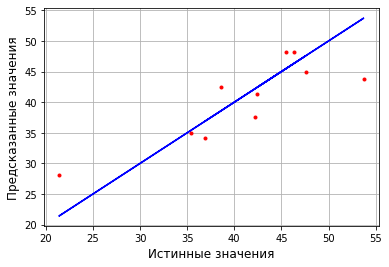

In [39]:
plt.plot(y_test.iloc[:,0],y_test.iloc[:,0],color="blue")
plt.plot(y_test.iloc[:,0],predictors,".",color="red")
plt.xlabel("Истинные значения",fontsize=12)
plt.ylabel("Предсказанные значения", fontsize=12)
plt.grid()
plt.show();

In [40]:
gridCought.scorer_

<function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [41]:
gridCought.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=WrappedKruskalRegressor(n_iter_max=100, reg_W=1,
                                               tol=1e-06, weight_rank=1),
             iid='warn', n_jobs=None,
             param_grid={'n_iter_max': [300000],
                         'reg_W': array([1.e-06, 1.e-03, 1.e+00, 1.e+03]),
                         'tol': array([1.e-06, 1.e+00, 1.e+06]),
                         'weight_rank': range(1, 6)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)>

In [60]:
 gridCought.cv_results_

{'mean_fit_time': array([1.84724365e+02, 1.33805616e+02, 7.06979847e-01, 1.28220963e+00,
        2.97970438e+00, 1.67442322e-02, 6.54746056e-02, 1.34457350e-01,
        2.11561823e-01, 3.44115114e-01, 1.73454285e-02, 6.96840763e-02,
        1.32151461e-01, 2.83754110e-01, 3.44538546e-01, 2.84757390e+00,
        3.68797728e+01, 1.01356579e+03, 1.20347384e+02, 1.66959630e+03,
        2.14593410e-02, 5.55526733e-02, 9.77586746e-02, 1.65989923e-01,
        2.62022829e-01, 1.23339653e-02, 5.10396957e-02, 1.01077414e-01,
        1.66020155e-01, 2.60557079e-01, 6.08659060e+01, 2.72349798e+02,
        4.48102086e+02, 2.19639480e+02, 2.05719359e+02, 1.62418842e-02,
        6.38705254e-02, 1.20519781e-01, 1.97625637e-01, 3.64067650e-01,
        1.34350300e-02, 5.95587730e-02, 1.19217348e-01, 1.93515301e-01,
        3.04209852e-01, 6.39317134e+01, 5.40228164e+01, 3.28180871e+01,
        4.06642649e+01, 7.45927350e+01, 1.44412518e-02, 6.65765762e-02,
        1.35760689e-01, 2.16475201e-01, 3.10226

In [43]:
gridCought.cv_results_['mean_test_score']

array([-1.94725903, -1.20234605, -2.37135473, -2.34971526, -1.28876866,
       -0.56440616, -1.22393784, -1.42054168, -1.25347567, -1.57954612,
       -2.26944725, -0.50615847, -2.07489042, -1.02799115, -1.55341373,
       -1.69953442, -1.18511589, -0.70894033, -1.32380483, -0.58988544,
       -2.43341858, -0.83157111, -1.79958815, -1.35884643, -1.01983707,
       -2.76231602, -1.45865063, -1.37313893, -3.04093676, -0.93891769,
        0.23592157, -0.47413206, -0.44717629, -0.44620373, -0.44710572,
       -0.26337899, -1.00981646, -0.73992456, -0.54187129, -0.38447075,
        0.06204808, -0.63420008, -0.37747817, -1.1881647 , -0.5797442 ,
       -5.64052295, -5.64442679, -5.6405567 , -5.64050837, -5.64050528,
       -5.61944225, -5.78447084, -5.69142617, -5.88714542, -6.03647555,
       -6.12199827, -5.50324003, -5.8004489 , -5.85361174, -5.55129827])

In [44]:
cvres  = gridCought.cv_results_

In [45]:
gridCought.cv_results_['mean_test_score'][6]

-1.2239378435385617

In [46]:
min(gridCought.cv_results_['mean_test_score'])

-6.121998273597158

In [47]:
for mean_score,  params  in zip(cvres [ "mean_test_score" ], 
                                cvres [ "params" ]
                                ): 
    print (np.sqrt(mean_score**2) , params) 

1.94725902535621 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1e-06, 'weight_rank': 1}
1.2023460524784542 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1e-06, 'weight_rank': 2}
2.371354732753063 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1e-06, 'weight_rank': 3}
2.349715257986199 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1e-06, 'weight_rank': 4}
1.2887686631751205 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1e-06, 'weight_rank': 5}
0.5644061556187371 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1.0, 'weight_rank': 1}
1.2239378435385617 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1.0, 'weight_rank': 2}
1.4205416841124738 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1.0, 'weight_rank': 3}
1.2534756749570546 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1.0, 'weight_rank': 4}
1.5795461204158883 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1.0, 'weight_rank': 5}
2.2694472466629407 {'n_iter_max': 300000, 'reg_W': 1e-06, 'tol': 1000000.0, 'weight_rank': 1}
0.5061584667764485 {

In [48]:
score=[]
score_l=[]
parametr_reg_w=[]
my_error=[]

In [49]:
def f(x,y):
    my_error=[]
    for i in range(0,len(y)):
        my_error+=[(x[i]-y[i])**2]
    return my_error
my_error=f(np.array(y_test.iloc[:,0]),predictors)
print(my_error)

[7.850956241146074, 14.643503530972978, 97.84755979576325, 1.2699418109641938, 7.174238516316934, 3.705601479475632, 0.2091952710743093, 43.9737599086611, 20.99064700853719, 8.000135861234329]


In [50]:
for mean_score,  params  in zip (cvres [ "mean_test_score"],cvres [ "params" ] )  : 
    score+=[np.array(mean_score)**2]
    score_l+=[np.array((mean_score))]
    parametr_reg_w+=[params["reg_W"]]
print (score,"   ",parametr_reg_w) 


[3.791817711831217, 1.4456360299105218, 5.62332326855035, 5.521161793613149, 1.6609246671821871, 0.31855430850032207, 1.4980238448458247, 2.0179386763011036, 1.5712012677090437, 2.494965946520884, 5.150390805386002, 0.2561963934894851, 4.305170234864341, 1.0567658052358588, 2.4130942088948997, 2.8884172298324398, 1.4044996680536639, 0.5025963968107625, 1.7524592358836124, 0.3479648372542488, 5.921525999042486, 0.6915105064961977, 3.2385175177559034, 1.8464636293615941, 1.0400676410909038, 7.630389779862541, 2.1276616494438976, 1.8855105301314188, 9.247296377664615, 0.8815664337046574, 0.055658988224825304, 0.2248012138083978, 0.1999666367697437, 0.1990977665246284, 0.1999035205587089, 0.06936849421360114, 1.019729277773035, 0.5474883618516719, 0.2936244957893255, 0.14781776010688247, 0.0038499640442989065, 0.402209741504579, 0.14248976614500133, 1.4117353641731105, 0.3361033323232356, 31.815499182795282, 31.859553811762346, 31.815879891971047, 31.815334649187193, 31.81529985828484, 31.

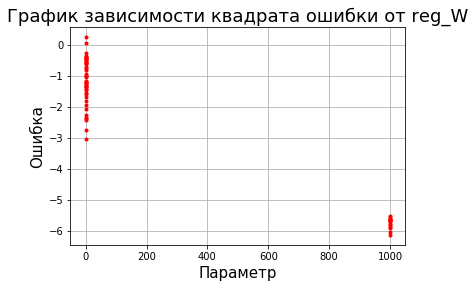

In [54]:
plt.plot(parametr_reg_w,score_l,".",color="red")
#plt.plot(parametr_reg_w,score_l,".",color="blue")
plt.grid()
plt.ylabel("Ошибка",fontsize=15)
plt.xlabel("Параметр",fontsize=15)
plt.title("График зависимости квадрата ошибки от reg_W",fontsize=18)
plt.show();

In [52]:
?file_obj.write(plt)

Object `file_obj.write(plt)` not found.
